In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

In [3]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [4]:
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.drop("sl_no", axis=1, inplace = True)

In [6]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [8]:
# Here we see total count of salary is 148 and total rows are 215
print("Percentage of students not placed : {}".format(((215-148)/215)*100))

Percentage of students not placed : 31.16279069767442


In [9]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
# Selecting non integer columns:
object_cols=df.select_dtypes(include = ['object']).columns
object_cols

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [11]:
for col in object_cols:
    display(df[col].value_counts())

M    139
F     76
Name: gender, dtype: int64

Central    116
Others      99
Name: ssc_b, dtype: int64

Others     131
Central     84
Name: hsc_b, dtype: int64

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

No     141
Yes     74
Name: workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Placed        148
Not Placed     67
Name: status, dtype: int64

## Data Exploration:

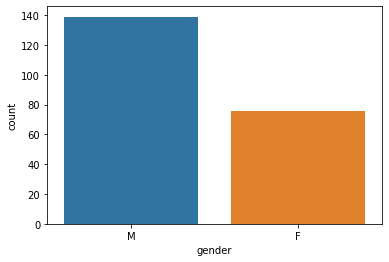

In [12]:
## Gender

sns.countplot("gender", data=df)
plt.show()

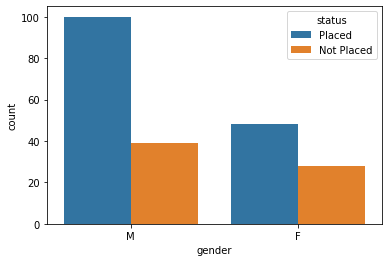

In [13]:
## lets see how gender affects placements:

sns.countplot("gender", hue = "status", data=df)
plt.show()

### OBSERVATIONS:
The number of male students are almost double as compared to female.
The percentage of placed vs not placed for female candidates is significantly low as compared to male candidates thus we can conclude male candidates are accepted more often than female.

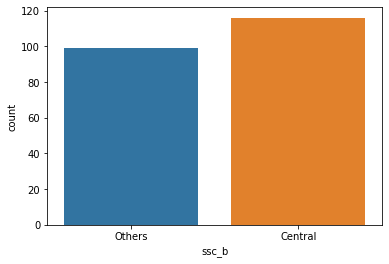

In [14]:
## ssc_b secondary board of education.
sns.countplot("ssc_b", data = df)
plt.show()

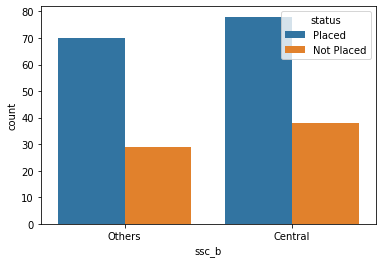

In [15]:
### Lets see how ssc_b affects status
sns.countplot("ssc_b", hue="status", data=df)
plt.show()

### Observations:
There are slighlty more CBSE students than other boards and their isnt a big difference in placement percentage for both

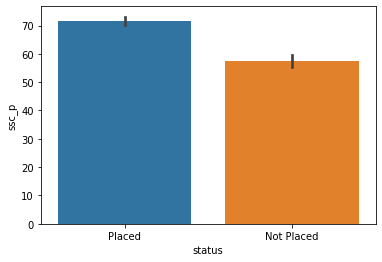

In [16]:
## Secondary education percentage (ssc_p)
sns.barplot(x="status", y="ssc_p", data=df)

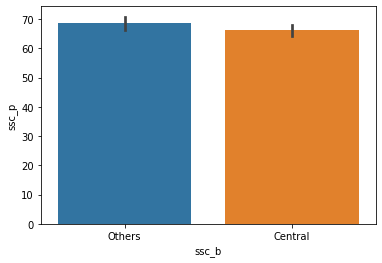

In [17]:
## percentage scored by difference boards
sns.barplot(x="ssc_b", y="ssc_p", data=df)

### OBSERVATIONS:
Percentage in secondary education has a clear impact on placements.
Higher percentage candidates have a very good chance of getting placed.

There isnt much disparity between percentage scored in different boards

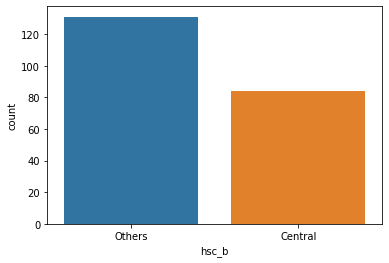

In [18]:
## Higher secondary education board (hsc_b)

sns.countplot("hsc_b", data = df)
plt.show()

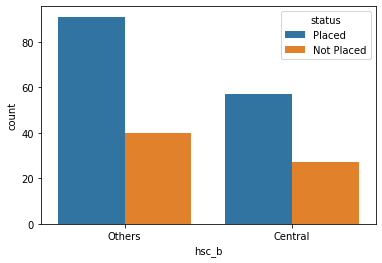

In [19]:
## impact of specific board on placements
sns.countplot("hsc_b", hue="status", data=df)
plt.show()

### OBSERVATIONS:
Turns out more number of candidates opted for others for 12th grade as compared to 10th grade.

This time also not much difference between in the percentage of placed candidates in respective boards. Thus, we conclude board doesn't matter in placements.

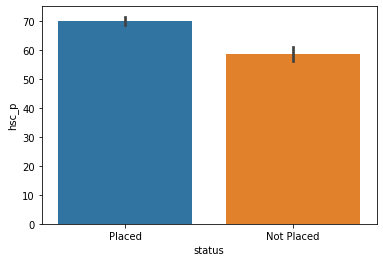

In [20]:
## Higher secondary education percentage

### percentage vs status
sns.barplot(x="status", y="hsc_p", data=df)

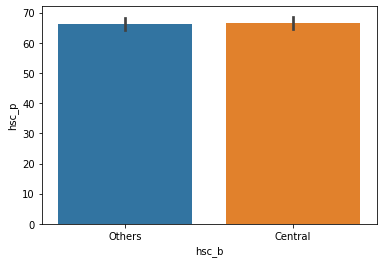

In [21]:
### Let's see the how much percentage was scored by students in 12th grade in different boards

sns.barplot(x="hsc_b", y="hsc_p", data=df)

### OBSERVATIONS:
Percentage in higher secondary education also has a clear impact on placements. Higher percentage candidates have a very good chance of getting placed.

Though the Board isn't a determinant in defining how much precentage students score.


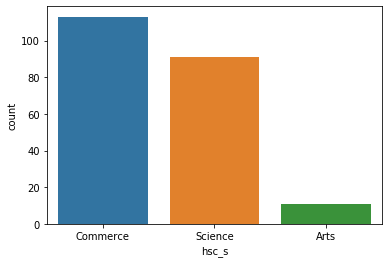

In [22]:
## Specialization in Higher Secondary Education (hsc_s)

### count of all the specializations
sns.countplot("hsc_s", data=df)

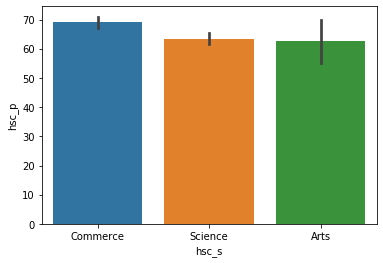

In [23]:
### how well each specialisation students performed

ax = sns.barplot(x="hsc_s", y="hsc_p", data=df)

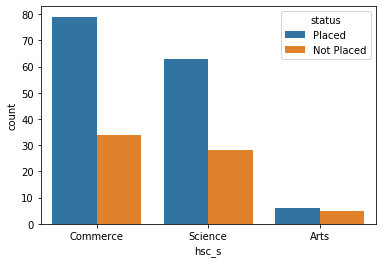

In [24]:
### the impact of taking a spcific branch on placements

sns.countplot("hsc_s", hue="status", data=df)

### OBSERVATIONS:
The most popular branch turns out to be commerce. Science is the second most popular and the least popular is arts.
(This may be skewed due to cutoffs for certain branches are higher)

Almost every branch students performed equally but commerce students have slightly better score than other two.

Looking at the percentage of placed and not placed we can say that science branch students have more chance of getting placed than commerce students and most of the students in arts are not placed

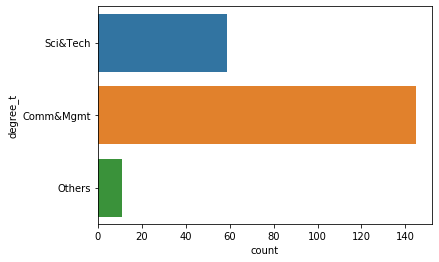

In [25]:
## Degree type and percentage (degree_t & degree_p)

### count for each type
sns.countplot(y ="degree_t", data=df)

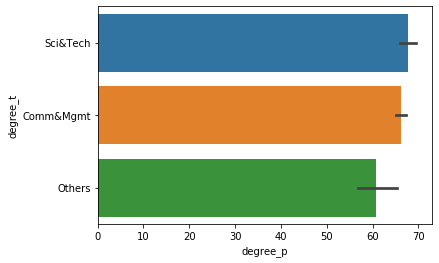

In [26]:
# Let's look at how well each field students performed

sns.barplot(y="degree_t", x="degree_p", data=df)

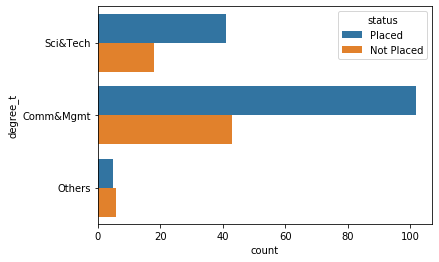

In [27]:
### the impact of taking a field on placements

sns.countplot(y="degree_t", hue="status", data=df)

### OBSERVATION:
The students opted for following fields:

Science and Technology (must be science students)
Commerce and management (might be a mixture of commerce and Arts)
Others

There is not much difference in performace of students from Science and Commerce but there but students who opted for "Others" have low performance

Looks like Commerce and Science degree students are preffered by companies Students who opted for Others have very low placement chance

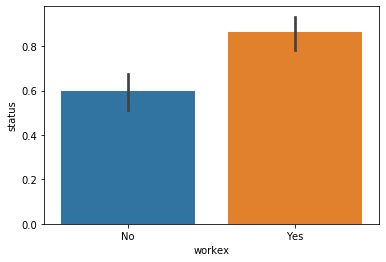

In [28]:
## Work experience (workex)

### The impact of workex on placements:

df['status'] = df['status'].map( {'Placed':1, 'Not Placed':0})

sns.barplot(x="workex", y="status", data=df)

### OBSERVATION:
80% of students with prior workex got placed.
60% of students without any experience got placed.

Companies prefer candidates with work experience so the students with internships and past job experience have better chances of being placed.

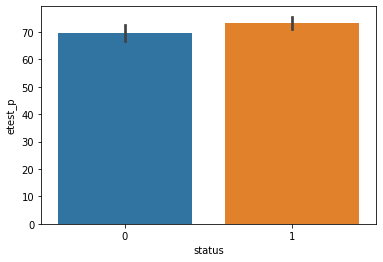

In [29]:
## Employability test percentage (etest_p)

sns.barplot(x="status", y="etest_p", data=df)

### OBSERVATION:
We can see that getting good percentages in employability test does not guarantee placement of the candidate.
Which is great as talent should get more recognition than a score.

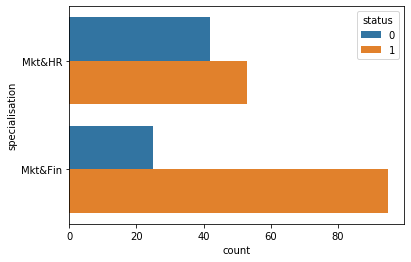

In [30]:
## Specialization (Post grad- MBA)

### Let's see how specialisation effects the placement of candidates

sns.countplot(y="specialisation", hue="status", data=df)

Text(0.5, 1.0, 'Salary vs MBA Percentage')

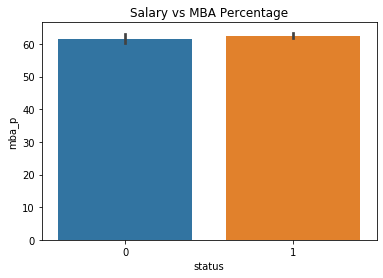

In [31]:
## MBA percentage (mba_p)

sns.barplot(x="status", y="mba_p", data=df)
plt.title("Salary vs MBA Percentage")

### Observations

We can see that getting good percentages in MBA does not guarantee placement of the candidate.

C:\Users\Gautam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Gautam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Gautam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Gautam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


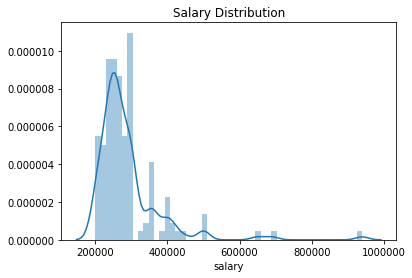

In [32]:
## Salary

### Distribution of salary

sns.distplot(df['salary'], bins=50)
plt.title("Salary Distribution")
plt.show()

### Observations

Looking at the distribution we can say that the most of the students get a package between 200k-400k and most salaries above 400k are outliers.

Text(0.5, 1.0, 'Salary vs gender')

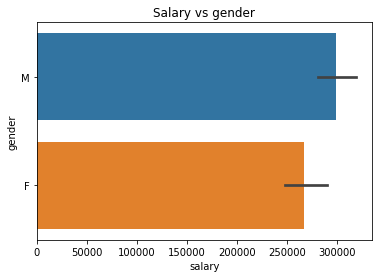

In [33]:
## Is there a pay gap between the genders

sns.barplot(y="gender", x="salary", data=df)
plt.title("Salary vs gender")

### OBSERVATION:
Male candidates are making more money as compared to female candidates.

Text(0.5, 1.0, 'Salary vs Gender based on specialisation')

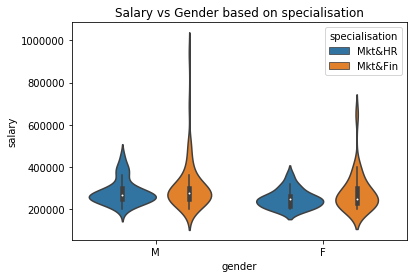

In [34]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["specialisation"])
plt.title("Salary vs Gender based on specialisation")

### OBSERVATIONS:
Salary column for male candidates seems to have more outliers than females which means that a lot more male candidates got more than the average package/salary.

Mean salary is somewhere around 220k - 230k.

Mkt&Fin students are given higher salaries as compared to Mkt&HR.

Text(0.5, 1.0, 'Gender vs Salary based on work experience')

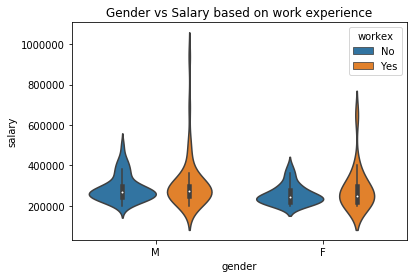

In [35]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["workex"])
plt.title("Gender vs Salary based on work experience")

### OBSERVATIONS:
Work Experience is a clear indicator as more work experience results in higher (Salary/package) jobs.

###### The maximum salary in male candidates with experience is >1M and for female it is around 700k.
###### The maximum salary in male candidates without experience is ~550k and for female it is around 430k.

Text(0.5, 1.0, 'Salary vs Gender based on Board in 10th grade')

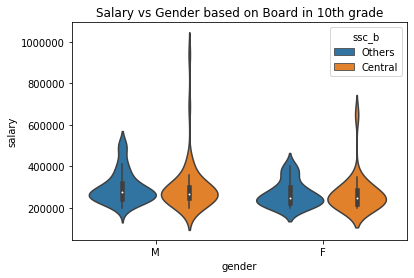

In [36]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["ssc_b"])
plt.title("Salary vs Gender based on Board in 10th grade")


### Observations
Both Male and Female candidates from CBSE got higher package as compared to other boards thus we can conclude that central board in 10th grade might fetch you higher package.

Text(0.5, 1.0, 'Salary vs Gender based on Board in 12th grade')

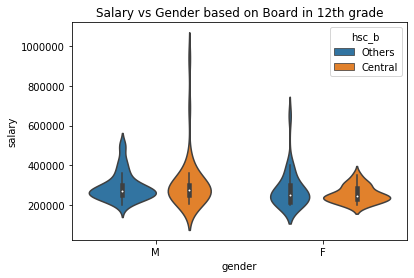

In [37]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["hsc_b"])
plt.title("Salary vs Gender based on Board in 12th grade")

### OBSERVATION:
Male candidates from CBSE got higher Pacakge as compared to other boards whereas this was totally opposite in case of female candidates thus there is not much guarantee that either of the board will fetch higher Packages.

Text(0.5, 1.0, 'Salary vs Gender based on Degree Type')

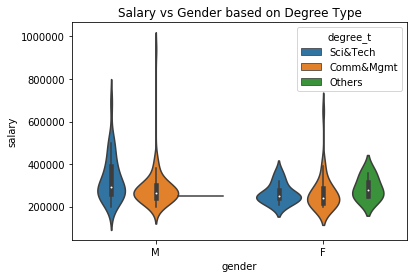

In [38]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["degree_t"])
plt.title("Salary vs Gender based on Degree Type")

### OBSERVATIONS:
Both male and female candidate got high Packages choosing Comm&Mgmt as their degree.

Male candidates from Sci&Tech got high Packages as compared to Female candidates.

None of the male candidates got placed from "Others" category whereas for female candidates the package is close to what female Sci&Tech candidates got.

## Conclusions Drawn (Compiling everything)
More male candidates got placed as compared to female candidates.
Male Candidates got higher Pacakge as compared to female candidates.
Type of Board choosen does not have any effect on placements thus we can drop in preprocessing steps.
Most of the students preferred Central board in 10th grade whereas other boards in 12th grade.
Candidates with higher percentages have better chance of placements.
Choosing Science and Commerce as Specialisation seems to have perk when it comes to placments.
Maximum package was bagged by male candidate from Mkt&Fin branch which is around 940k.
Commerce is the most popular branch among candidates.
Mean Pacakge is around 220k for male and female candidates individually.
Choosing Sci&Tech and Comm&Mngmt as degree will fetch you higher Pacakge.
Mkt&Fin major have higher salaries and more placement chance as compared to Mkt&HR.
Employability test percentage and MBA percentage does not effect the placements

# Data Refining after EDA

#### We will do some preproceesing based on our conclusions

In [39]:
## Dropping useless columns based on conclusions

df.drop(['ssc_b', 'hsc_b', 'salary'], axis=1, inplace=True)
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1


#### we removed salary because it clearly depends on if the students get placed or not and is something you cant put as input for predicting placement. 

In [40]:
## Encoding features which have 2 categorical values

df["gender"] = df.gender.map({"M":0,"F":1})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [41]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,1,66.28,1
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,0,59.43,0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1


In [42]:
## We use get dummies for features with 3 or more categories so that every category is either 0 or 1

for column in ['hsc_s', 'degree_t']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies

In [43]:
df.drop(['degree_t','hsc_s'], axis=1, inplace=True)
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1,0,1,0,1,0,0


#### now as we can represent 3 categories by [0,0],[0,1],[1,0]
#### So we drop one of the three category columns we created in place of ['hsc_s', 'degree_t']

In [44]:
df.drop(['Arts', 'Others'], axis=1, inplace=True)
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Commerce,Science,Comm&Mgmt,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1,1,0,0,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,1,0,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1,0,0,1,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0,1,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1,1,0,1,0


In [45]:
## Seeing the correlation between features (particularly status)
df.corr()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Commerce,Science,Comm&Mgmt,Sci&Tech
gender,1.000000,0.068969,0.021334,0.173217,-0.085153,-0.084294,-0.106160,0.300531,-0.090670,0.001087,-0.042682,0.036215,-0.084072
ssc_p,0.068969,1.000000,0.511472,0.538404,0.175675,0.261993,0.172536,0.388478,0.607889,-0.101323,0.189847,-0.179581,0.221235
hsc_p,0.021334,0.511472,1.000000,0.434206,0.141025,0.245113,0.241630,0.354823,0.491228,0.258093,-0.226675,0.112816,-0.053599
degree_p,0.173217,0.538404,0.434206,1.000000,0.122648,0.224470,0.218286,0.402364,0.479861,-0.022724,0.092006,-0.032755,0.123477
workex,-0.085153,0.175675,0.141025,0.122648,1.000000,0.056735,0.191174,0.168811,0.276060,-0.056719,0.033270,-0.102517,0.102962
etest_p,-0.084294,0.261993,0.245113,0.224470,0.056735,1.000000,0.236315,0.218055,0.127639,-0.021732,0.055352,-0.012531,0.009748
specialisation,-0.106160,0.172536,0.241630,0.218286,0.191174,0.236315,1.000000,0.105728,0.250655,0.129985,-0.166639,0.101331,-0.061503
mba_p,0.300531,0.388478,0.354823,0.402364,0.168811,0.218055,0.105728,1.000000,0.076922,-0.049415,0.048050,-0.102088,0.125009
status,-0.090670,0.607889,0.491228,0.479861,0.276060,0.127639,0.250655,0.076922,1.000000,0.024414,0.007279,0.046849,0.008688
Commerce,0.001087,-0.101323,0.258093,-0.022724,-0.056719,-0.021732,0.129985,-0.049415,0.024414,1.000000,-0.901673,0.651804,-0.584673


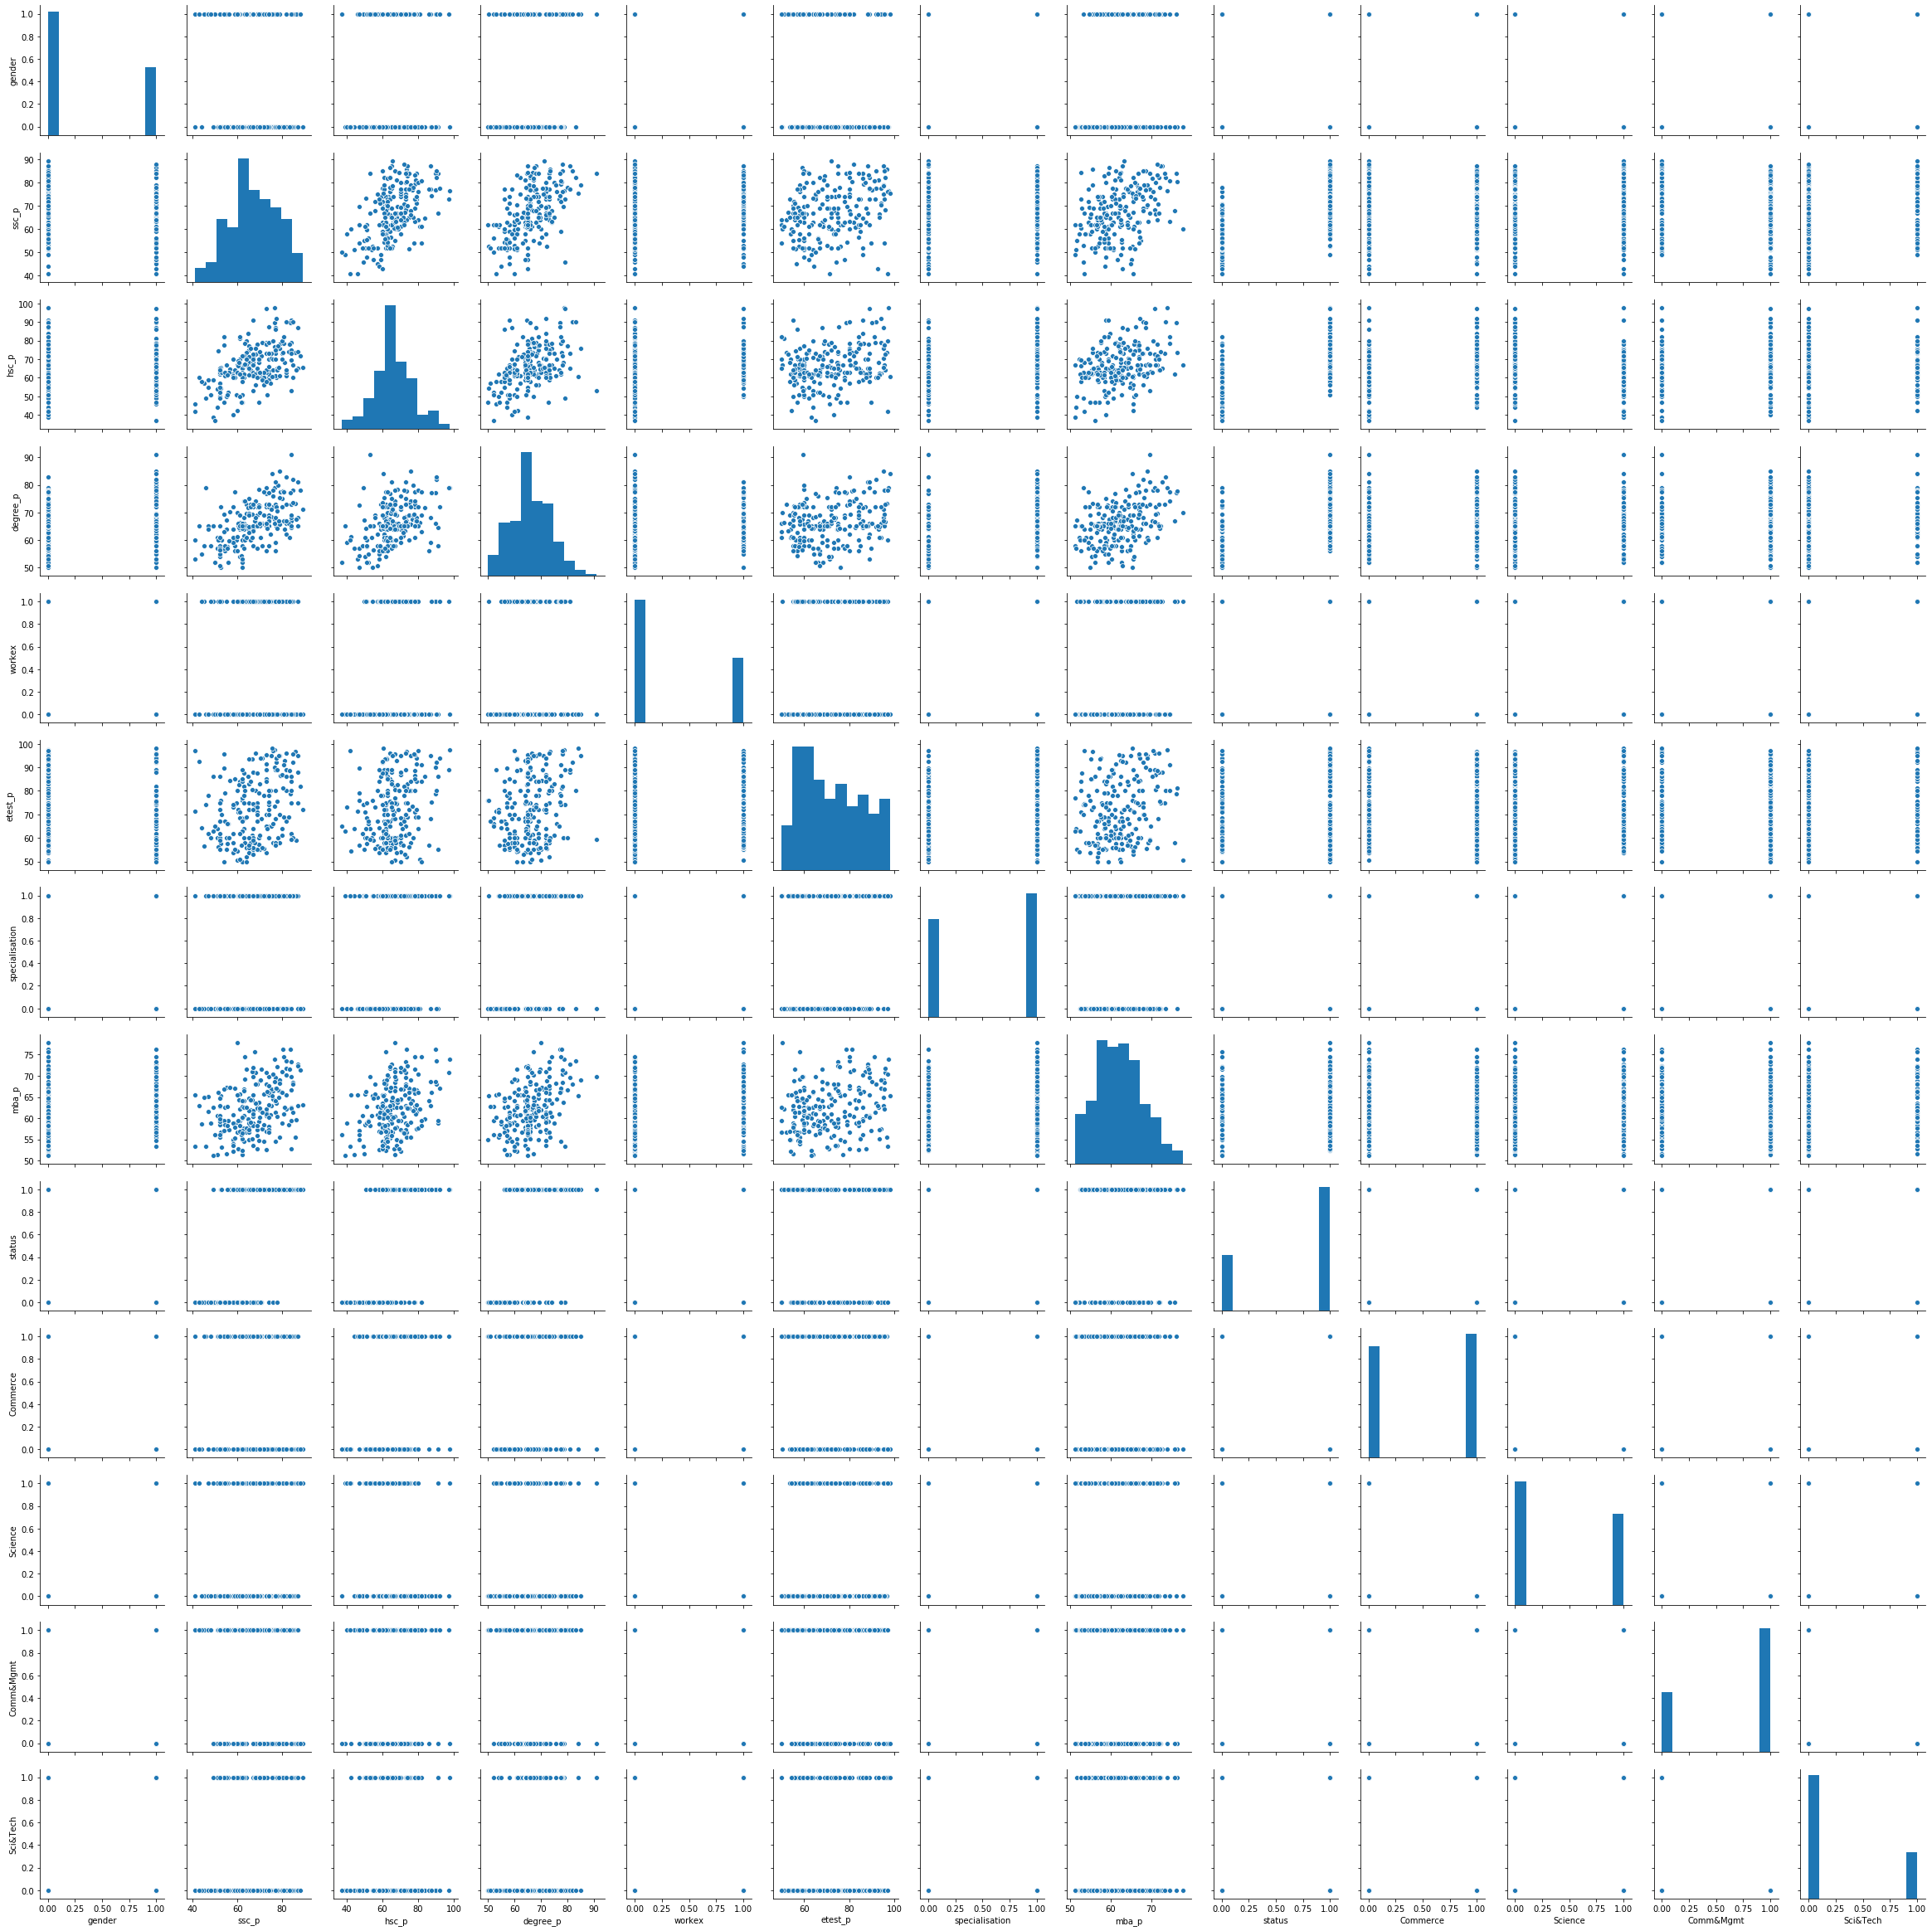

In [46]:
### lets see a pair plot between all features

sns.pairplot(df)

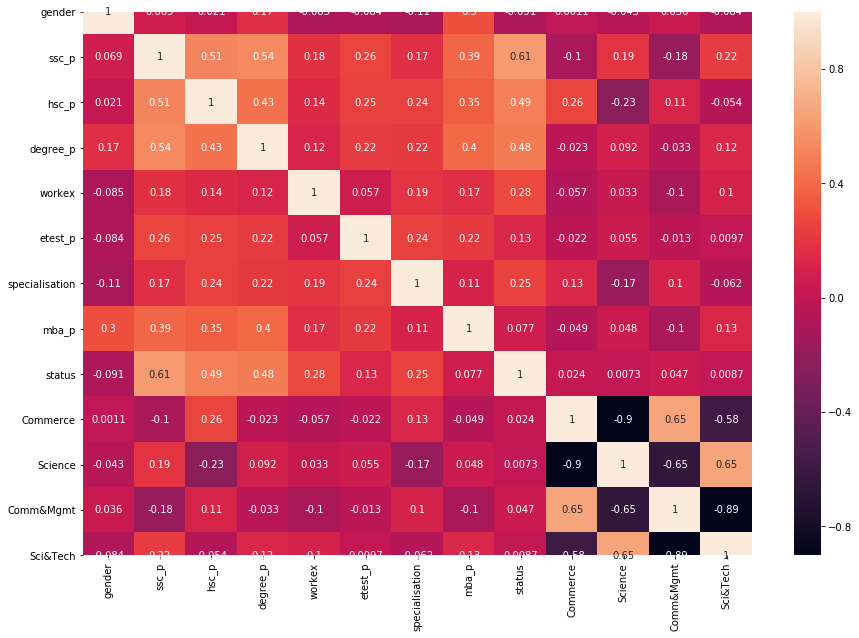

In [47]:
## lets plot a heatmap to simplify things


cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

## Train Test Split

In [48]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Commerce,Science,Comm&Mgmt,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1,1,0,0,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,1,0,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1,0,0,1,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0,1,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1,1,0,1,0


In [49]:
# target vector
y = df['status']

# dropping as it is not a predictor
df.drop('status', axis = 1, inplace = True)

# scaling the data so as to get rid of any dramatic results during modelling
sc = StandardScaler()

# predictors
X = sc.fit_transform(df)

# Let us now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (150, 12)
X-Test: (65, 12)
Y-Train: (150,)
Y-Test: (65,)


## Model building

### Logistic Regression

In [50]:
# creating our model instance
log_reg = LogisticRegression()

# fitting the model
log_reg.fit(X_train, y_train)

C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# predicting the target vectors

y_pred=log_reg.predict(X_test)

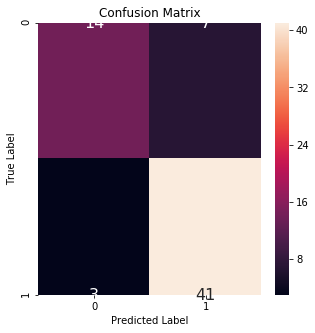

In [52]:
# creating confusion matrix heatmap

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Some Insights:
Our confusion Matrix looks decent. We have correctly predicted 41 (placed) + 14 (not-placed) correct predictions and 7 (not placed as placed) + 3(placed as not-placed) incorrect predictions.

We need to decrease these incorrect predictions because a good candidate can be rejected (false positive) [Type I error] and a bad candidate can be selected (false negatives) [Type II Error].

In [53]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.85      0.93      0.89        44

    accuracy                           0.85        65
   macro avg       0.84      0.80      0.81        65
weighted avg       0.84      0.85      0.84        65



In [54]:
# let's look at our accuracy

accuracy = accuracy_score(y_pred, y_test)
print(np.round(accuracy,3)*100)

84.6


#### We got 84.6% accuracy on a base model

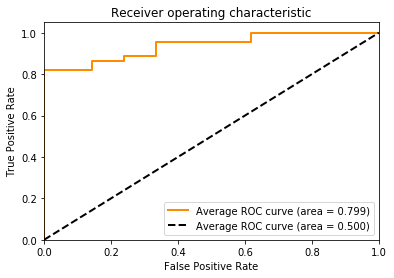

In [55]:
# plotting the ROC curve

auc_roc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Average ROC curve (area = {0:0.3f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', 
         label= 'Average ROC curve (area = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
# calculate auc fpr = false positive rate, tpr=true positive rate
auc_score = auc(fpr, tpr)
print(f"Our auc_score is {round(auc_score, 3)}.")

Our auc_score is 0.937.


### model random forrest regressor

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier()

In [58]:
### Hyperparameters
# no of trees
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1200, num =20)]
#print(n_estimators)
# no of features
max_features = ['auto', 'sqrt']
# max no of levels i.e. depth
max_depth = [int(x) for x in np.linspace(1, 30,num = 60)]
# min no of samples req to split a node
min_samples_split = [2,5,10,15,30,50,75,100]
# min no of samples req at each leaf node
min_samples_leaf = [1,2,5,7,10]

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
random_grid = {'n_estimators' : n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [10, 72, 135, 197, 260, 323, 385, 448, 511, 573, 636, 698, 761, 824, 886, 949, 1012, 1074, 1137, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30], 'min_samples_split': [2, 5, 10, 15, 30, 50, 75, 100], 'min_samples_leaf': [1, 2, 5, 7, 10]}


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [62]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 15, cv = 10, verbose = 2, random_state=42, n_jobs= 1)

In [63]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5 
[CV]  n_estimators=949, min_samples_split=50, min_samples_leaf=7, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=949, min_samples_split=50, min_sam

[CV]  n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=323, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=2, total=   0.3s
[CV] n_estimators=323, min_samples_split=5, min_samp

[CV]  n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14, total=   0.7s
[CV] n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14 
[CV]  n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14, total=   0.6s
[CV] n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14 
[CV]  n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14, total=   0.6s
[CV] n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14 
[CV]  n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14, total=   0.6s
[CV] n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14 
[CV]  n_estimators=698, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=14, total=   0.6s
[CV] n_estimators=698, min_samples_split=75

[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21 
[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21 
[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21 
[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21 
[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=21, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   55.3s finished
C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [64]:
predictions = rf_random.predict(X_test)

In [65]:
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.43      0.56        21
           1       0.78      0.95      0.86        44

    accuracy                           0.78        65
   macro avg       0.80      0.69      0.71        65
weighted avg       0.79      0.78      0.76        65



In [67]:
# let's look at our accuracy

accuracy = accuracy_score(predictions, y_test)
print(np.round(accuracy,3)*100)

78.5


### Decision tree classifier


In [68]:
# creating a list of depths for performing Decision Tree
depth = list(range(1,10))

# list to hold the cv scores
cv_scores = []

# perform 10-fold cross validation with default weights
for d in depth:
  dt = DecisionTreeClassifier(criterion="gini", max_depth=d, random_state=42)
  scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy', n_jobs = 1)
  cv_scores.append(scores.mean())

# finding the optimal depth
optimal_depth = depth[cv_scores.index(max(cv_scores))]
print("The optimal depth value is: ", optimal_depth)

The optimal depth value is:  8


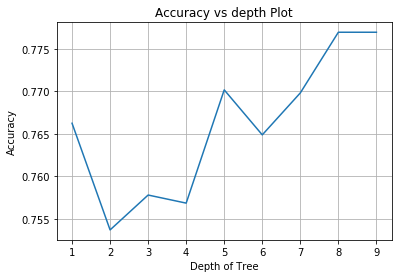

Accuracy scores for each depth value is :  [0.766 0.754 0.758 0.757 0.77  0.765 0.77  0.777 0.777]


In [69]:
# plotting accuracy vs depth
plt.plot(depth, cv_scores)
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs depth Plot")
plt.grid()
plt.show()

print("Accuracy scores for each depth value is : ", np.round(cv_scores, 3))

In [70]:
# create object of classifier
dt_optimal = DecisionTreeClassifier(criterion="gini", max_depth=optimal_depth, random_state=42)

# fit the model
dt_optimal.fit(X_train,y_train)

# predict on test vector
y_pred = dt_optimal.predict(X_test)

# evaluate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print(f"The accuracy on test set using optimal depth = {optimal_depth} is {np.round(accuracy, 3)}%")

The accuracy on test set using optimal depth = 8 is 86.154%


In [71]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.89      0.91      0.90        44

    accuracy                           0.86        65
   macro avg       0.84      0.84      0.84        65
weighted avg       0.86      0.86      0.86        65



### As we can see our logistic regression model performed with 84.6% accuracy
### And our random forrest classifier was able to get 80 % accuracy
### And finally our decision tree classifier gave us an accuracy score of 86.154%

#### So lets try to combine our 2 best performers

In [72]:
# Using ensembling

# creating a list of our models
ensembles = [log_reg, dt_optimal]

# Train each of the model
for estimator in ensembles:
    print("Training the", estimator)
    estimator.fit(X_train,y_train)
    

Training the LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Training the DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
# Find the scores of each estimator

scores = [estimator.score(X_test, y_test) for estimator in ensembles]

scores

[0.8461538461538461, 0.8615384615384616]

In [74]:
# Training a voting classifier with hard voting and using logistic regression and decision trees as estimators

from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("log_reg",log_reg),
    ("dt_tree", dt_optimal),

]

In [75]:
# getting an instance for our Voting classifier

voting_clf = VotingClassifier(named_estimators)

In [76]:
# fit the classifier

voting_clf.fit(X_train,y_train)

C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt_tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=8,
                                    

In [77]:
# Let's look at our accuracy
acc = voting_clf.score(X_test,y_test)

print(f"The accuracy on test set using voting classifier is {np.round(acc, 4)*100}%")

The accuracy on test set using voting classifier is 90.77%


In [78]:
y_pred = voting_clf.predict(X_test)

In [79]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.97      0.89      0.93        44

    accuracy                           0.91        65
   macro avg       0.89      0.92      0.90        65
weighted avg       0.92      0.91      0.91        65



### As we can clearly see combining two good models using voting classifier can give us an even better model just compare the precision,recall and f1-score

## With an accuracy of 90.77%, The voting classifier with [log_reg, dt_optimal] is the best model and we will save this one as our best model

In [82]:
import pickle
# make a pkl file and open in write mode
file = open('Campus_recruitment_voting_classifier_logreg_dt_2.pkl','wb')
#dump information to that file
pickle.dump(voting_clf,file)

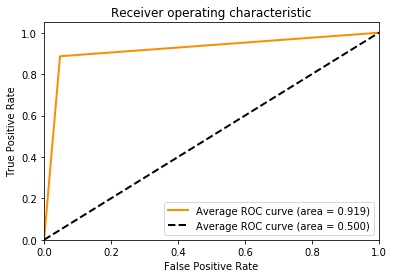

In [85]:
# plotting the ROC curve

auc_roc = roc_auc_score(y_test, voting_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict(X_test))

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Average ROC curve (area = {0:0.3f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', 
         label= 'Average ROC curve (area = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

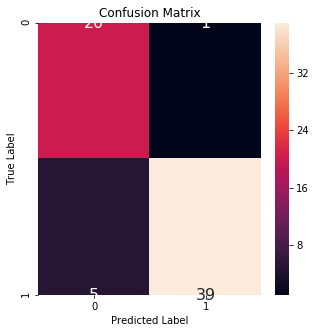

In [86]:
# creating confusion matrix heatmap

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [87]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)